In [1]:
import numpy as np
import pickle
import quadrotor_obs_gen


In [3]:
obs_list, obc_list = quadrotor_obs_gen.obs_gen_unseen(None, None, N_pc=40000, width=1)


for env_id in [0, 1]:
    file_name = "./trajectories/quadrotor_obs_generalize/{env_id}/env{env_id}.pkl".format(env_id=env_id)

    with open(file_name, 'rb') as f:
        t = list(pickle.load(f))

    def get_data_with_type_id(f_type, f_id):
        file_name = "trajectories/quadrotor_obs_generalize/{env_id}/{f_type}{f_id}.pkl".format(env_id=env_id, f_type=f_type, f_id=f_id)
        with open(file_name, 'rb') as f:
            data = pickle.load(f)

        return data

    def get_data_with_id(f_id):
        return [get_data_with_type_id(f_type, f_id) for f_type in ["path", "control", "cost", "start_goal", "time"]]

    for i in range(100):
        for f_type in ["path", "control", "cost", "start_goal", "time"]:
            data = get_data_with_type_id(f_type, "_".join(map(str, t[i])))
            with open("./trajectories/out/{env_id}/{f_type}_{f_id}.pkl".format(env_id=env_id+10, f_type=f_type, f_id=i), 'wb') as f:
                pickle.dump(data, f)
    
    with open("./trajectories/out/obs_{env_id}.pkl".format(env_id=env_id+10), 'wb') as f:
        pickle.dump(obs_list[env_id], f)
    with open("./trajectories/out/obc_{env_id}.pkl".format(env_id=env_id+10), 'wb') as f:
        pickle.dump(obc_list[env_id], f)

using generalization env


<IPython.core.display.Javascript object>


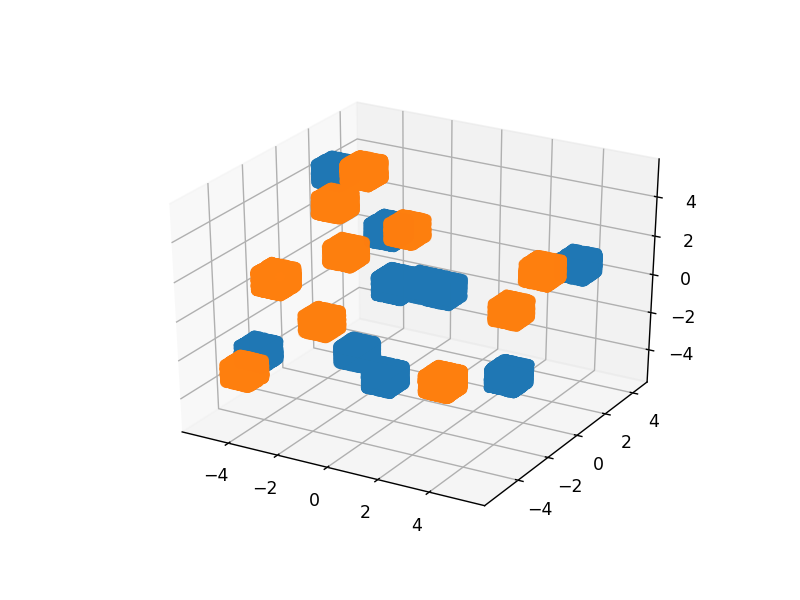

In [14]:
%matplotlib notebook
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

obc = obc_list[0].reshape(-1, 3)
ax.scatter(obc[:, 0], obc[:, 1], obc[:, 2])

obc = obc_list[1].reshape(-1, 3)
ax.scatter(obc[:, 0], obc[:, 1], obc[:, 2])

In [7]:
obs_list.shape

(12, 10, 3)

In [22]:
obs

array([[-0.22466851, -1.35490355,  3.50066437],
       [-0.71747203, -1.75437427,  3.85856294],
       [-0.56634824, -1.20971596,  3.64637699],
       ...,
       [-0.59219634,  2.95606717, -1.24024154],
       [-0.70329387,  2.87276981, -1.36957552],
       [-1.27714453,  3.36462078, -1.20495521]])

In [23]:
obs_list, obc_list = quadrotor_obs_gen.obs_gen_unseen(None, None, N_pc=40000, width=1)


using generalization env


In [25]:
obs_list[0]

(12, 10, 3)